In [2]:
#CSC530_Project1
#Author : Lan Nguyen, Tien Pham

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from wordcloud import WordCloud

#Preprocessing - Begin
drop_cols = ['X', 'Y', 'ORGANIZATIONACRONYM', 'SERVICECALLCOUNT',
             'SERVICEDUEDATE', 'SERVICEORDERDATE', 'INSPECTIONFLAG',
             'INSPECTIONDATE', 'INSPECTORNAME',
             'STREETADDRESS', 'XCOORD', 'YCOORD', 'CITY', 'STATE',
             'MARADDRESSREPOSITORYID', 'DETAILS']
df = pd.read_csv("City_Service_Requests_in_2018.csv")

#Drop unnecessary collumns
df.drop(drop_cols, axis=1, inplace=True)

#Change all columns into lower case format
df.columns = map(str.lower, df.columns)

#Consider zipcode and ward as string
df.zipcode = df.zipcode.astype(str).str.strip().str.strip('.0')
df.ward = df.ward.astype(str).map(lambda x: x.strip('Ward')).str.strip().str.strip('.0')

#Classify collumn
df['resolved'] = [0 if x == True else 1 for x in df['resolutiondate'].isnull()]
df['resolutiondate'].fillna('NaN', inplace=True)
df['svc'] = [x.lower() for x in df['servicecodedescription']]

#Compute different time between add date and resolution date
df['adddate'] = df['adddate'].astype('datetime64[ns]')
df['resolutiondate'] = df['resolutiondate'].astype('datetime64[ns]')
df['turnover'] = (df['resolutiondate'] - df['adddate']).astype('timedelta64[h]')*df['resolved']

df.head(10)

#Preprocessing - End







,objectid,servicecode,servicecodedescription,servicetypecodedescription,adddate,resolutiondate,serviceorderstatus,status_code,servicerequestid,priority,latitude,longitude,zipcode,ward,resolved,svc,turnover
0,306864,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,2018-01-02 08:47:54,2018-01-08 11:03:01,CLOSED,CLOSED,18-00000555,STANDARD,38.894965,-76.935862,20019,7,1,bulk collection,146.0
1,306865,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,2018-01-02 09:03:56,2018-01-08 11:52:54,CLOSED,CLOSED,18-00000617,STANDARD,38.966837,-77.077571,20015,3,1,bulk collection,146.0
2,306866,EMNPV,Emergency No-Parking Verification,PEMA- Parking Enforcement Management Administr...,2018-01-02 07:16:17,2018-01-02 08:42:57,CLOSED,CLOSED,18-00000390,STANDARD,38.909417,-77.040607,20036,2,1,emergency no-parking verification,1.0
3,306867,SRC02,Snow/Ice Removal,SNOW,2018-01-02 08:40:41,2018-01-09 11:20:11,CLOSED,CLOSED,18-00000532,STANDARD,38.927450,-77.097581,20016,3,1,snow/ice removal,170.0
4,306868,S0321,Recycling Collection - Missed,SWMA- Solid Waste Management Admistration,2018-01-02 08:33:28,2018-01-07 08:18:39,CLOSED,CLOSED,18-00000509,STANDARD,38.862290,-76.989317,2002,8,1,recycling collection - missed,119.0
5,306869,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,2018-01-02 06:30:46,2018-01-02 08:49:05,CLOSED,CLOSED,18-00000375,STANDARD,38.901620,-77.040354,20006,2,1,parking enforcement,2.0
6,306870,EMNPV,Emergency No-Parking Verification,PEMA- Parking Enforcement Management Administr...,2018-01-02 08:32:47,2018-01-02 09:00:16,CLOSED,CLOSED,18-00000508,STANDARD,38.906445,-77.023978,20001,2,1,emergency no-parking verification,0.0
7,306871,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,2018-01-02 08:27:45,2018-01-09 11:43:00,CLOSED,CLOSED,18-00000488,STANDARD,38.847915,-76.977525,2002,8,1,bulk collection,171.0
8,306872,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,2018-01-02 08:34:31,2018-01-05 12:02:54,CLOSED,CLOSED,18-00000513,STANDARD,38.957570,-76.997376,20011,4,1,bulk collection,75.0
9,306873,S0261,Parking Enforcement,PEMA- Parking Enforcement Management Administr...,2018-01-02 08:03:12,2018-01-02 09:01:13,CLOSED,CLOSED,18-00000431,STANDARD,38.905803,-77.026552,20001,2,1,parking enforcement,0.0


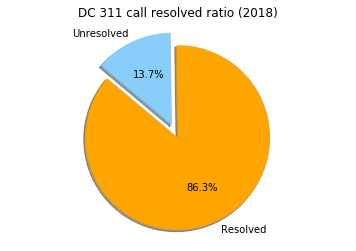

In [11]:
#Plot the pie chart 1 - Begin
numRequested = len(df['adddate'])
obj = df.apply(lambda x: sum(x.isnull()),axis=0)
numUnsolved = obj.resolutiondate

labels = 'Resolved','Unresolved'
sizes = [numRequested,numUnsolved]
explode = (0,0.15)
colors = ['orange', 'lightskyblue']
plt.title('DC 311 call resolved ratio (2018)')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()
#Plot the pie chart 1 - End

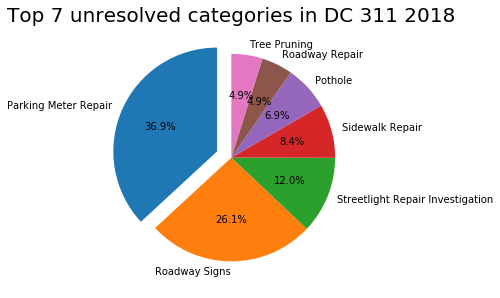

In [6]:
#Plot the pie chart 2 - Begin
top10=df[df.resolved==0]['servicecodedescription'].value_counts()[:7]
plt.pie(top10,
       labels=top10.index,
       explode=(0.15,0,0,0,0,0,0),
       startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.title("Top 7 unresolved categories in DC 311 2018", size=20)
plt.show();
#Plot the pie chart 2 - End

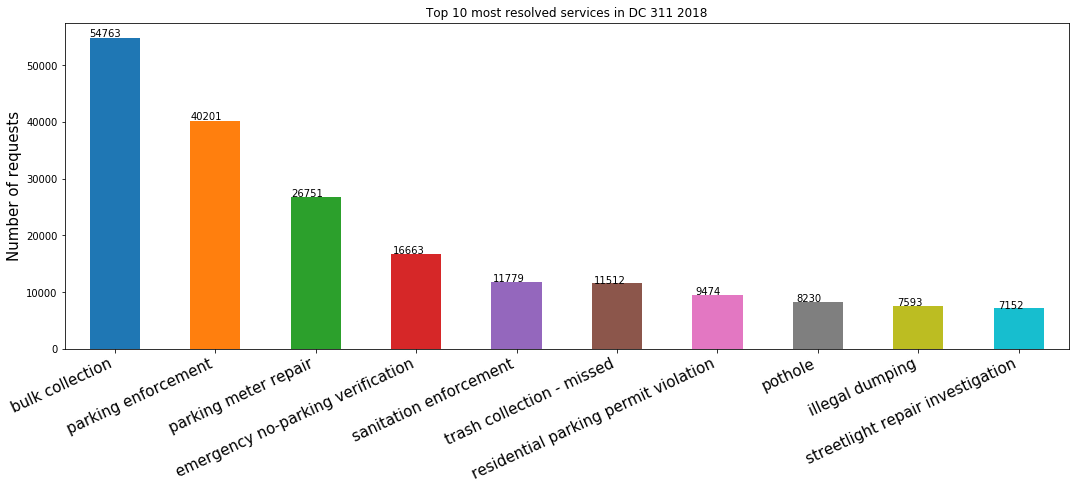

In [5]:
#Plot the bar chart - Begin
total=df[df.resolved!=0]['svc'].value_counts()[:10]
Obj = total.plot(figsize=(18,6), title='Top 10 most resolved services in DC 311 2018', kind ='bar')
Obj.set_ylabel("Number of requests",size =15)
Obj.set_xticklabels(total.index, rotation=25, ha='right', minor=False, size=15);
for p in Obj.patches:
    Obj.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#Plot the bar chart - End

Text(0.5, 1.0, 'Request for bulk collection by ward')

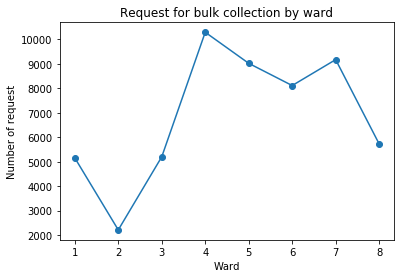

In [5]:
#Plot the line chart - Begin
ward = []
count= 0
for i in range(1,9):
    df2= df[df.svc=='bulk collection']  
    bulk = df2[df2.ward==str(i)]
    for x in bulk.svc:
        count = count + 1
    ward = ward + [count]
    count=0
s= [1,2,3,4,5,6,7,8]
plt.plot(s,ward,marker='o')
plt.ylabel('Number of request')
plt.xlabel('Ward')
plt.title('Request for bulk collection by ward')
#Plot the line chart - End

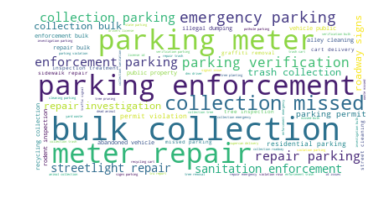

In [3]:
#Plot the WordCloud - Begin
text = " ".join(serviceCodeDescription for serviceCodeDescription in df.svc)
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#Plot the WordCloud - End

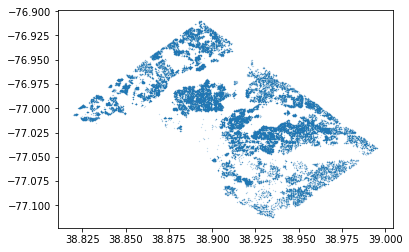

In [3]:
#Plot the scatter - Begin
x = df[df.svc=='bulk collection']['latitude']
y = df[df.svc=='bulk collection']['longitude']
radii = (0.2)**2
plt.scatter(x, y,s=radii , alpha=0.5)
plt.show()
#Plot the scatter - End